In [3]:
import numpy as np
from cvxopt.modeling import variable, op
from scipy.optimize import linprog
import warnings 
warnings.filterwarnings("ignore")
from IPython.display import Image
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpProblem, LpMinimize, LpVariable, LpMaximize, LpStatus, LpInteger

# Задание 1. 

На основе: https://github.com/lena346/mat/blob/main/Shashkina_Elena_PI19-4_var_24_Zadanie_7_Transportnaya_zadacha%20(3).ipynb



In [4]:
# Запасы
a = np.array([60, 130, 90]) 
#Потребности
b = np.array([30, 80, 60, 110]) 
# Матрица тарифов
C = np.array([[10000,8, 15, 4],
              [9, 15, 2, 10000],
              [6, 12, 7, 1]])  

In [5]:
# Функция возвращает матрицу системы ограничений
def ogran(a, b):
    m = len(a)
    n = len(b)
    h = np.diag(np.ones(n))
    v = np.zeros((m, n))
    v[0] = 1
    for i in range(1, m):
        h = np.hstack((h, np.diag(np.ones(n))))
        k = np.zeros((m, n))
        k[i]=1
        v = np.hstack((v, k))
    return np.vstack((h, v)).astype(int), np.hstack((b,a))

# Метод потенциалов
def m_pot(a, b, c):
    # Проверяем замкнутостm:
    if a.sum() > b.sum():
        b = np.hstack((b, [a.sum() - b.sum()]))
        c = np.hstack((c, np.zeros(len(a)).reshape(-1, 1)))
    elif a.sum() < b.sum():
        a = np.hstack((a, [b.sum() - a.sum()]))
        c = np.vstack((c, np.zeros(len(b))))
        
    m = len(a)
    n = len(b)
    A_eq, b_eq = ogran(a, b)
    res = linprog(c.reshape(1, -1), A_eq=A_eq, b_eq=b_eq, bounds=(0, None), method='simplex')
    return res.x.astype(int).reshape(m, n), res.fun.astype(int) 

In [56]:
x2, opt = m_pot(a, b, C)
print('Оптимальный план перевозки груза: \n', x2)
print('Оптимальная стоимость перевозки: ', opt)
print('План Х не оптимальный')

Оптимальный план перевозки груза: 
 [[ 0 40  0 20]
 [30 40 60  0]
 [ 0  0  0 90]]
Оптимальная стоимость перевозки:  1480
План Х не оптимальный


# Задание 2.

**Линейное программирование**

На основе: https://github.com/lena346/mat/blob/main/Шашкина%20Елена%20ПИ19-4%20Задание%208%20по%20ТЗ%20Game.ipynb 

Пункт 1

In [50]:
def antagonistic_game(A_strtg, B_strtg, matrix):
    
    min_A = matrix.min(axis=1)
    min_B = matrix.max(axis=0)
    
    # максмин (выбрали наихудшее значение в каждой строке и из них нашли максимальное) - индекс максимального выигрыша игрока A
    opt_A_strtg = min_A.argmax()
    # минимакс (выбрали наилучшее значение в каждом столбце и из них нашли минимальное) - максимального проигрыша игрока B
    opt_B_strtg = min_B.argmin() 
    
    c = -np.array([1, 1])
    A_ub = matrix
    b_ub = np.array([1, 1, 1])
    bounds = [[0, None], [0, None]]

    m = linprog(c=c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method= "revised simplex")
    
    print(' a) Оптимальная чистая стратегия для игрока А: №' + str(opt_A_strtg + 1) + ' - ' + str(B_strtg[opt_A_strtg]) + '\n', 
          'б) Цена игры для игрока А при выборе чистой оптимальной стратегии (максимальный выигрыш):  ' + str(min_A[opt_A_strtg]) + '\n',
          'в) Стратегия для игрока Б при оптимальной стратегии А: №' + str(opt_B_strtg + 1) + ' - ' + str(B_strtg[opt_B_strtg]) + '\n',
          'г) Цена игры для игрока Б при оптимальной стратегии А (максимальный проигрыш): ' + str(min_B[opt_B_strtg]) + '\n', 
          'д) Таблица смешанных стратегий для игрока А: ' + str(m.x / -m.fun) + '\n', 
          'е) Цена игры для игрока А при выборе смешанной оптимальной стратегии: ' + str(1 / -m.fun) + '\n')

In [52]:
antagonistic_game(['A1','A2', 'A3'], ['A1', 'A2'], np.array([
    [10, 7],
    [8, 9],
    [12, 2]
]))

 a) Оптимальная чистая стратегия для игрока А: №2 - A2
 б) Цена игры для игрока А при выборе чистой оптимальной стратегии (максимальный выигрыш):  8
 в) Стратегия для игрока Б при оптимальной стратегии А: №2 - A2
 г) Цена игры для игрока Б при оптимальной стратегии А (максимальный проигрыш): 9
 д) Таблица смешанных стратегий для игрока А: [0.5 0.5]
 е) Цена игры для игрока А при выборе смешанной оптимальной стратегии: 8.5



**Графический метод**

y = 3 * x + 7

y = -x + 9

y= 10*x +2

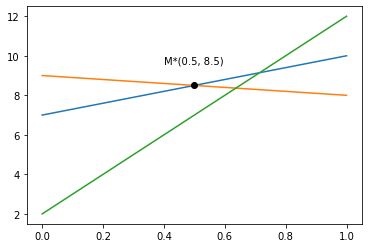

In [23]:
from matplotlib import pyplot as plt

x,y = np.meshgrid(d,d)
  
ax = plt.subplots()

plt.plot([7,10]) 
plt.plot([9,8]) 
plt.plot([2,12]) 

y1 = 3 * x + 7

y2 = -x + 9

y3 = 10*x +2


#точка
plt.plot(0.5, 8.5, 'ko')
plt.text(0.4, 9.6, f'M*({0.5}, {8.5})')

#показ графа
plt.show()

точка пересечения зелёной и синей

3 * x + 7 = 10*x +2

7 * x = 5



x = 5/7

y = 64/7 = 9 1/7

точка пересечения оранжевой и синей

3 * x + 7 = -x + 9

3* x + x - 2 = 0

4 * x = 2



x = 1/2

y = 8,5

нам нужно взять минимальную - это эта точка